## SVRT task 1 dataset

In [1]:
import numpy as np
import glob
from sklearn.utils import shuffle
from PIL import Image, ImageOps
from tqdm import tqdm
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def shuffle_dataset(ds, lbls):
    dataset, labels = shuffle(ds, lbls, random_state=np.random.randint(50))
    return dataset, labels

def load_images(images_path, img_format):
    print("Loading images...")
    image_paths = glob.glob(images_path + "/*." + img_format)
    binary_images = []
    for path in tqdm(image_paths):
        img = ImageOps.grayscale(Image.open(path)) #  cv2.imread(path, 0)
        thresh = 127
        fn = lambda x : 255 if x > thresh else 0
        bin_img = img.point(fn, mode='1')
        binary_images.append( 1 - np.array(bin_img))
    return np.array(binary_images)

images_path = './data/svrt_dataset/svrt_task1_64x64'

images = load_images(images_path, img_format="png")


Loading images...


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [05:31<00:00, 211.09it/s]


In [2]:

train_dataset = np.concatenate((images[:30000], images[35000:65000]))
test_dataset = np.concatenate((images[30000:35000], images[65000:70000]))

train_labels = np.concatenate(([[1, 1, 0, 1]] * 30000, [[1, 1, 1, 0]] * 30000))
test_labels = np.concatenate(([[1, 1, 0, 1]] * 5000, [[1, 1, 1, 0]] * 5000))

train_ims, train_ys = shuffle_dataset(train_dataset, train_labels)
test_ims, test_ys = shuffle_dataset(test_dataset, test_labels)

train_ys.shape

(60000, 4)

[1 1 0 1]


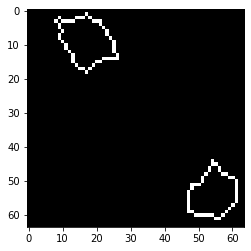

________________________________________
[1 1 1 0]


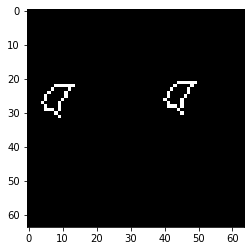

________________________________________
[1 1 0 1]


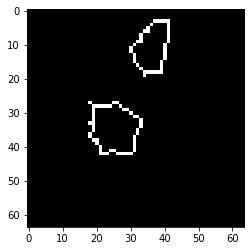

________________________________________
[1 1 1 0]


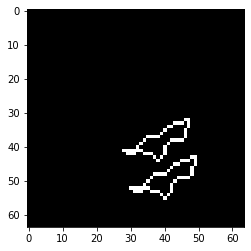

________________________________________
[1 1 1 0]


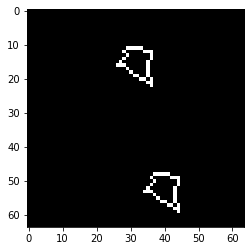

________________________________________
[1 1 0 1]


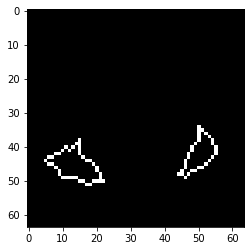

________________________________________
[1 1 1 0]


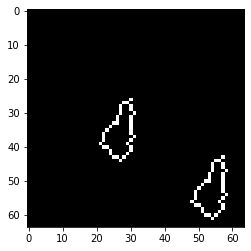

________________________________________
[1 1 1 0]


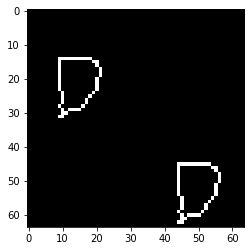

________________________________________
[1 1 1 0]


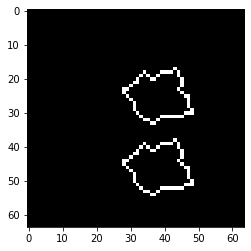

________________________________________
[1 1 0 1]


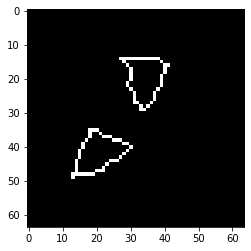

________________________________________
[1 1 0 1]


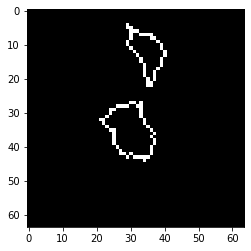

________________________________________
[1 1 1 0]


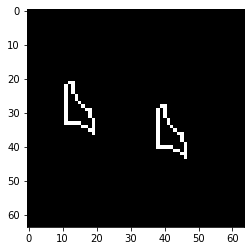

________________________________________
[1 1 0 1]


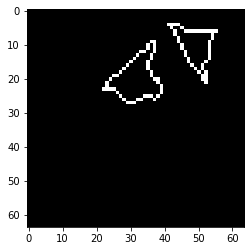

________________________________________
[1 1 0 1]


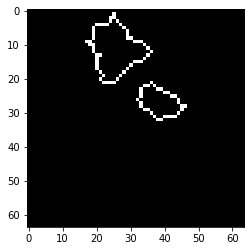

________________________________________
[1 1 1 0]


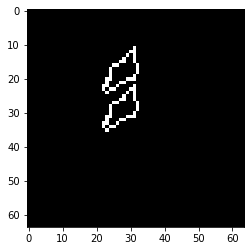

________________________________________
[1 1 1 0]


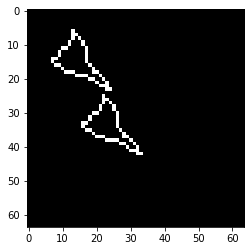

________________________________________
[1 1 1 0]


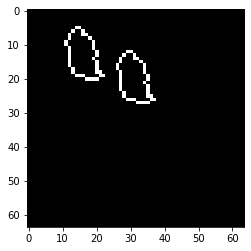

________________________________________
[1 1 1 0]


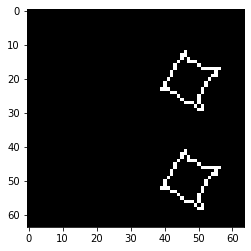

________________________________________
[1 1 0 1]


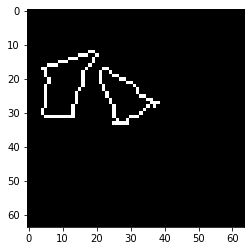

________________________________________
[1 1 1 0]


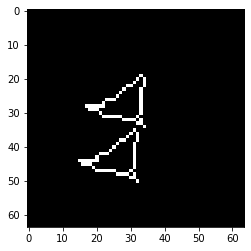

________________________________________
[1 1 1 0]


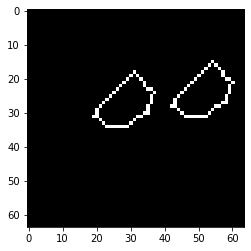

________________________________________
[1 1 0 1]


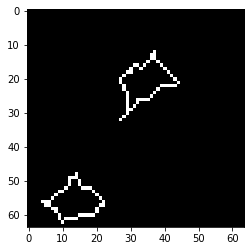

________________________________________
[1 1 1 0]


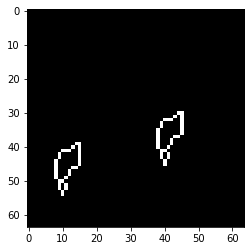

________________________________________
[1 1 1 0]


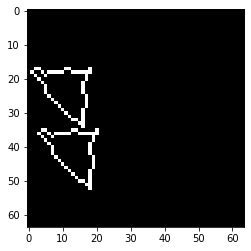

________________________________________
[1 1 1 0]


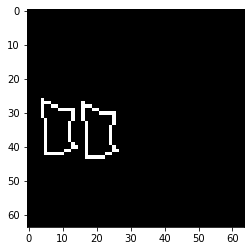

________________________________________
[1 1 1 0]


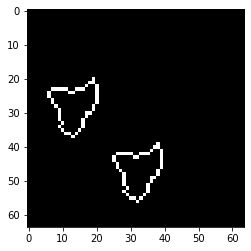

________________________________________
[1 1 1 0]


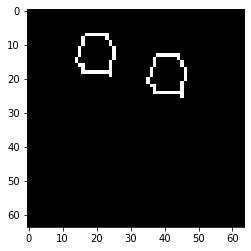

________________________________________
[1 1 1 0]


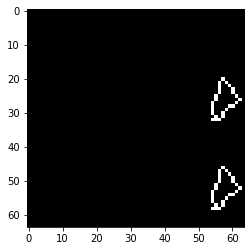

________________________________________
[1 1 0 1]


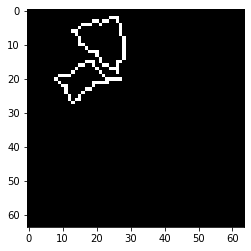

________________________________________
[1 1 1 0]


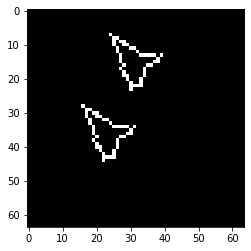

________________________________________
[1 1 0 1]


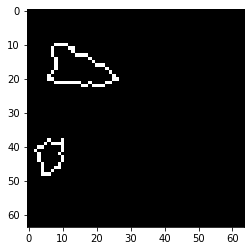

________________________________________
[1 1 0 1]


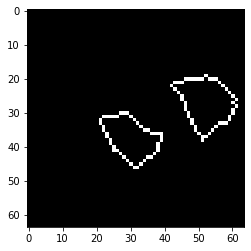

________________________________________
[1 1 1 0]


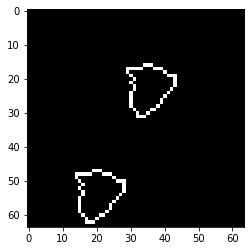

________________________________________
[1 1 1 0]


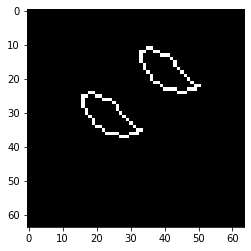

________________________________________
[1 1 0 1]


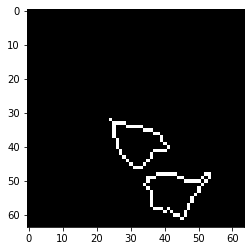

________________________________________
[1 1 1 0]


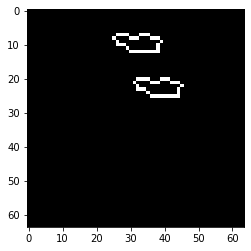

________________________________________
[1 1 0 1]


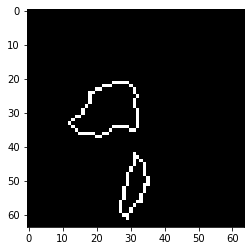

________________________________________
[1 1 1 0]


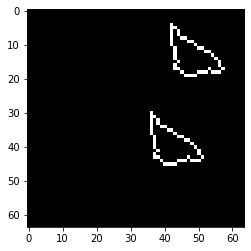

________________________________________
[1 1 0 1]


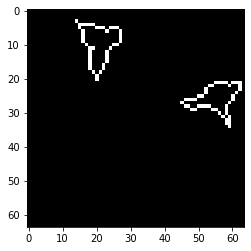

________________________________________
[1 1 0 1]


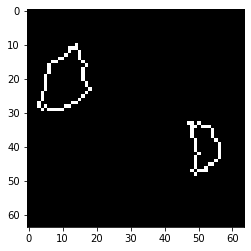

________________________________________
[1 1 0 1]


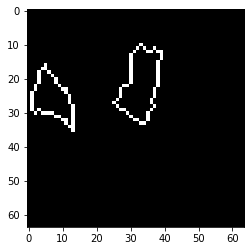

________________________________________
[1 1 1 0]


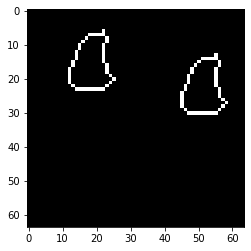

________________________________________
[1 1 0 1]


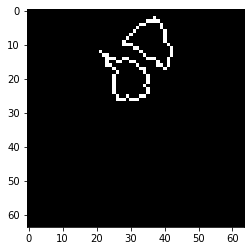

________________________________________
[1 1 0 1]


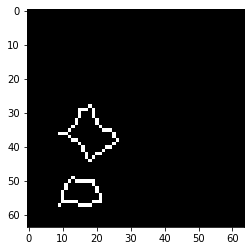

________________________________________
[1 1 0 1]


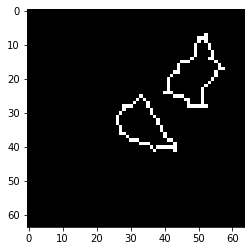

________________________________________
[1 1 1 0]


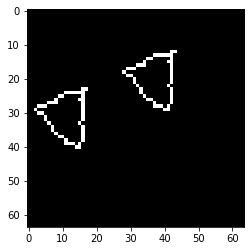

________________________________________
[1 1 0 1]


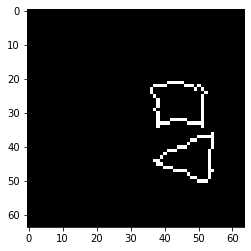

________________________________________
[1 1 1 0]


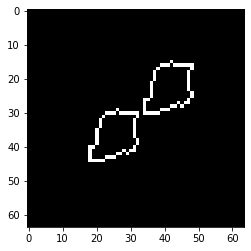

________________________________________
[1 1 1 0]


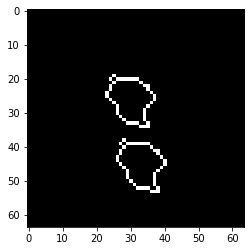

________________________________________
[1 1 0 1]


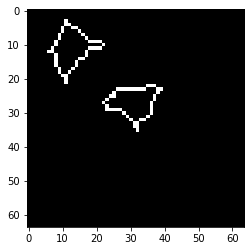

________________________________________


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

for i in range(2000,2050):
    print(test_ys[i])
    plt.imshow(test_ims[i], cmap='gray')
    plt.show()
    print('_'*40)

In [4]:
import torch
print("generate train dataset...")
#train_ims, train_ys = generate_displays(args, train=True)  #, train_val_split='none'

tensor_train_ims = torch.unsqueeze(torch.Tensor(train_ims), 1) #/255 # transform to torch tensor
#tensor_train_ims = torch.clip(torch.sum(tensor_train_ims, dim=1, keepdim=True),0, 1)
#tensor_train_ys = torch.sum(torch.Tensor(train_ys), dim=1)
tensor_train_ys = torch.Tensor(train_ys)

# val_ims, val_ys = generate_displays(args, train=True, train_val_split='val')
# tensor_val_ims = torch.Tensor(val_ims)/255 # transform to torch tensor
# tensor_val_ims = torch.clip(torch.sum(tensor_val_ims, dim=1, keepdim=True),0, 1)
# tensor_val_ys = torch.sum(torch.Tensor(val_ys), dim=1)

# tensor_train_ims = torch.cat((tensor_train_ims,tensor_val_ims),dim=0)
# tensor_train_ys = torch.cat((tensor_train_ys,tensor_val_ys),dim=0)

print("generate test dataset...")
#test_ims, test_ys = generate_displays(args, train=False)
tensor_test_ims = torch.unsqueeze(torch.Tensor(test_ims), 1) #/255 # transform to torch tensor
#tensor_test_ims = torch.clip(torch.sum(tensor_test_ims, dim=1, keepdim=True),0, 1)
#tensor_test_ys = torch.sum(torch.Tensor(test_ys), dim=1)
tensor_test_ys = torch.Tensor(test_ys)

print(tensor_train_ims.shape)
print(tensor_test_ys.shape)

generate train dataset...
generate test dataset...
torch.Size([60000, 1, 64, 64])
torch.Size([10000, 4])


In [5]:
save_dir = './data/svrt_dataset/'
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)

torch.save((tensor_train_ims, tensor_train_ys), save_dir + 'svrt_task1_64_train.pt')
torch.save((tensor_test_ims, tensor_test_ys), save_dir + 'svrt_task1_64_test.pt')